In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

Raw data at https://github.com/JiaweiZhuang/GC12_timing_logs.
Do not put log files in this repository are they are quite big.

In [2]:
df = pd.read_csv('./benchmark_summary_12.1.1.csv', sep=',', index_col=0)
df

,total time,standard hourly,spot hourly
c5.4xlarge,5656.195,0.680,0.27
c4.4xlarge,7282.290,0.796,0.25
c5.9xlarge,4030.448,1.530,0.58
c4.8xlarge,5444.040,1.590,0.57
Pleiade Haswell,5730.250,0.530,NaN
Pleiade Sandy Bridge,7748.750,0.290,NaN


In [3]:
df['standard total'] = df['total time'] * df['standard hourly']
df['spot total'] = df['total time'] * df['spot hourly']
df

,total time,standard hourly,spot hourly,standard total,spot total
c5.4xlarge,5656.195,0.680,0.27,3846.21260,1527.17265
c4.4xlarge,7282.290,0.796,0.25,5796.70284,1820.57250
c5.9xlarge,4030.448,1.530,0.58,6166.58544,2337.65984
c4.8xlarge,5444.040,1.590,0.57,8656.02360,3103.10280
Pleiade Haswell,5730.250,0.530,NaN,3037.03250,NaN
Pleiade Sandy Bridge,7748.750,0.290,NaN,2247.13750,NaN


In [4]:
plt.rcParams['legend.fontsize'] = 12.5

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

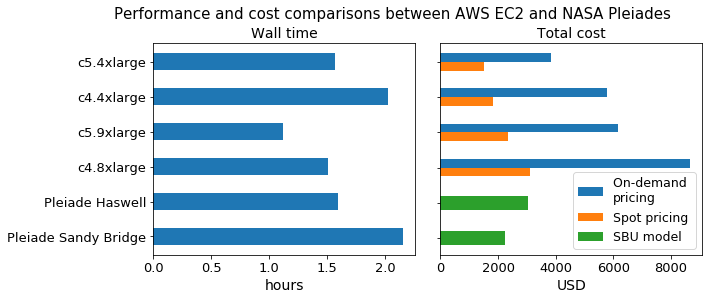

In [5]:
fig, axes = plt.subplots(1, 2, figsize=[10, 4])

ind = np.arange(6, 0, -1)  # up-down
# ind = np.arange(6)  # bottom-up

axes[0].barh(ind, df['total time']/3600, tick_label=df.index, height=0.5)
axes[0].set_title('Wall time')
axes[0].set_xlabel('hours')

axes[1].barh(ind[:4]+0.125, df['standard total'][:4], height=0.25, label='On-demand \npricing')
axes[1].barh(ind[:4]-0.125, df['spot total'][:4].astype('float'), height=0.25, label='Spot pricing')
axes[1].barh(ind[4:], df['standard total'][4:], height=0.4, label='SBU model')

axes[1].set_title('Total cost')
axes[1].set_xlabel('USD')
axes[1].legend(loc=4)

axes[1].set_yticks(ind)
axes[1].set_yticklabels([' '])

fig.suptitle('Performance and cost comparisons between AWS EC2 and NASA Pleiades', y=1.03, fontsize=15,  x=0.55)
fig.tight_layout()
fig.savefig('benchmark.png', dpi=300, bbox_inches='tight')